In [204]:
# Think twice , code once 

# First we need to define our target
# create a model that according to some features can provide a realistic prediction of breast cancer


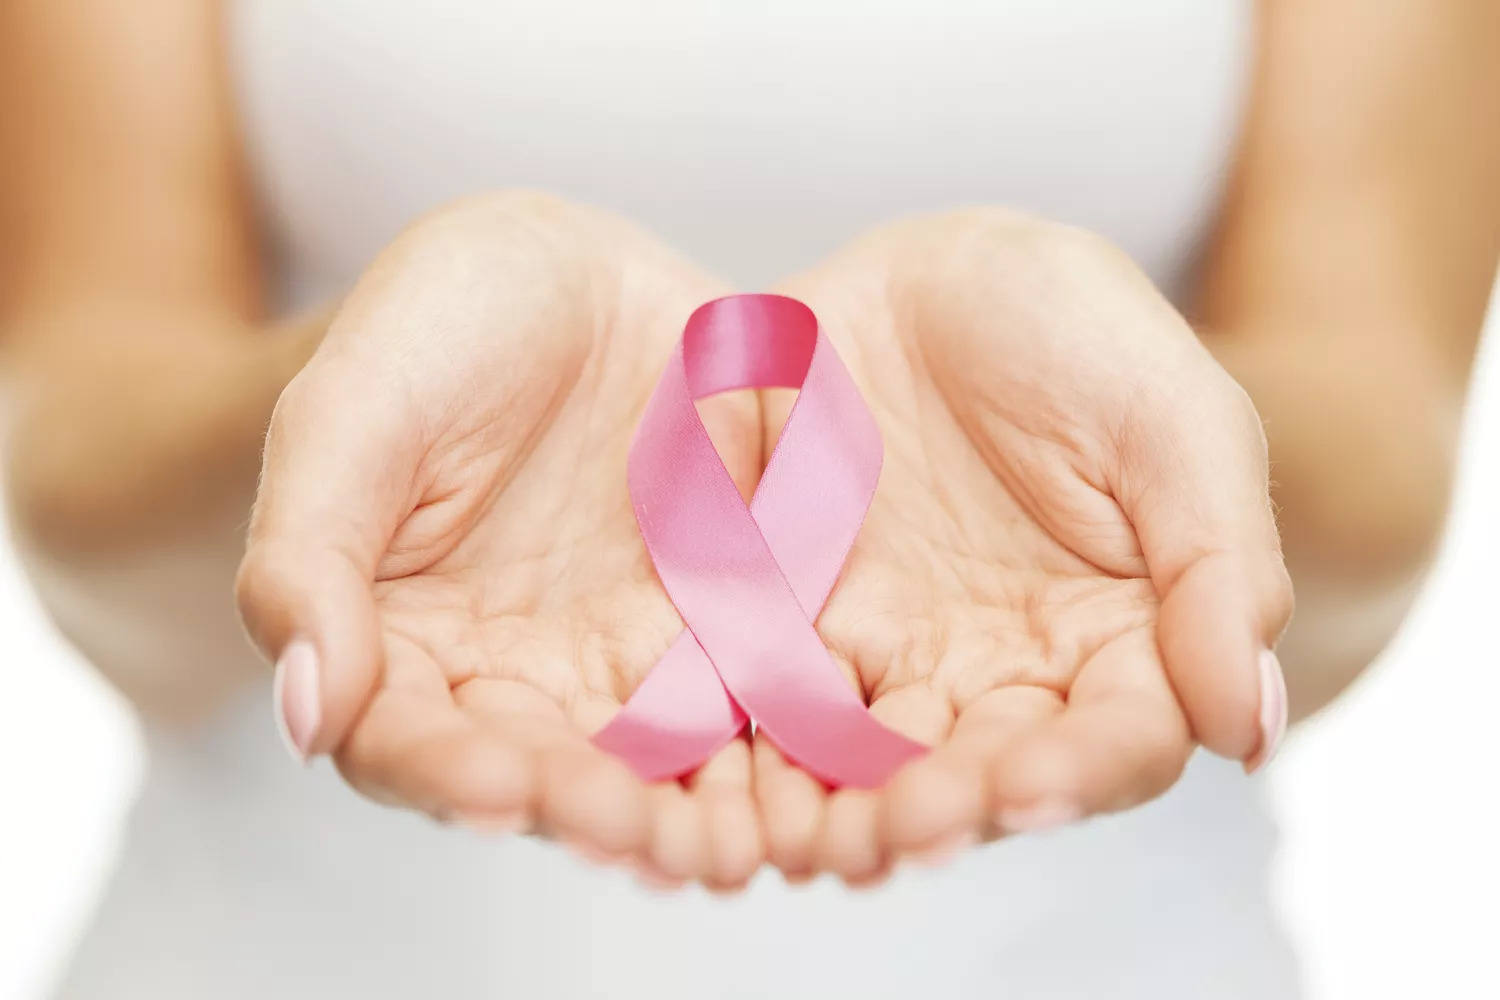

In [205]:
import os
from IPython.display import Image

image_path = os.path.join('/Users/juanus/Downloads/breast_Cancer_pic.jpg')

Image(filename=image_path)

Breast cancer is the most common cancer among women worldwide. 

According to the World Health Organization (WHO), breast cancer accounts for 25% of all cancer cases in women.

In 2020, there were an estimated 2.3 million new cases of breast cancer and 685,000 deaths from breast cancer in women.

The highest rates of breast cancer are found in North America, Europe, and Australia.  



# Think twice , code once 

-> Early detection and treatment are the keys to improving survival rates for breast cancer <-

The key is how to classify tumors into malignant(cancerous) or benign(non cancerous)

Target : Create a machine learning model to predict breast cancer based on features, aiming to improve women's safety and reduce future cases.


In [206]:
# Analising the data

# Diagnosis column is our target to predict diagnosis , when is M means "Cancerous" and when is B means "Non Cancerous"

In [225]:
import numpy as np
import pandas as pd 
!pip install scikit-learn

In [220]:

df = pd.read_csv("/Users/juanus/Downloads/breast-cancer.csv")

df.head(50)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [209]:
df.info()
# this dataset has non null values , seems clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [210]:
#There is non null values 
# second check
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [211]:
# Check diagnosis is binary : M = Cancer , and B " Non Cancer "
df["diagnosis"].unique()


array(['M', 'B'], dtype=object)

In [212]:
from typing_extensions import Concatenate

print(f"The shape of df is (raw,columns) ",df.shape)
print(f"The size of df is ",df.size)

The shape of df is (raw,columns)  (569, 32)
The size of df is  18208


In [213]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [219]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [215]:
import numpy as np

df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

correlations = df.corr()

print(correlations["diagnosis"].sort_values(ascending=False)[:10])

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis, dtype: float64


In [216]:
# features correlations when Diagnosis = Cancer (M)

#import numpy as np

#df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

#df_m = df[df["diagnosis"] == "M"]
#
#m_correlations = df_m.corr()

# Filter for correlations where diagnosis is 1
#m_correlations = m_correlations.loc[m_correlations["diagnosis"] == 1]

# Print the correlations with the highest absolute values
#print(m_correlations["diagnosis"].abs().sort_values(ascending=False)[:10])


<Axes: >

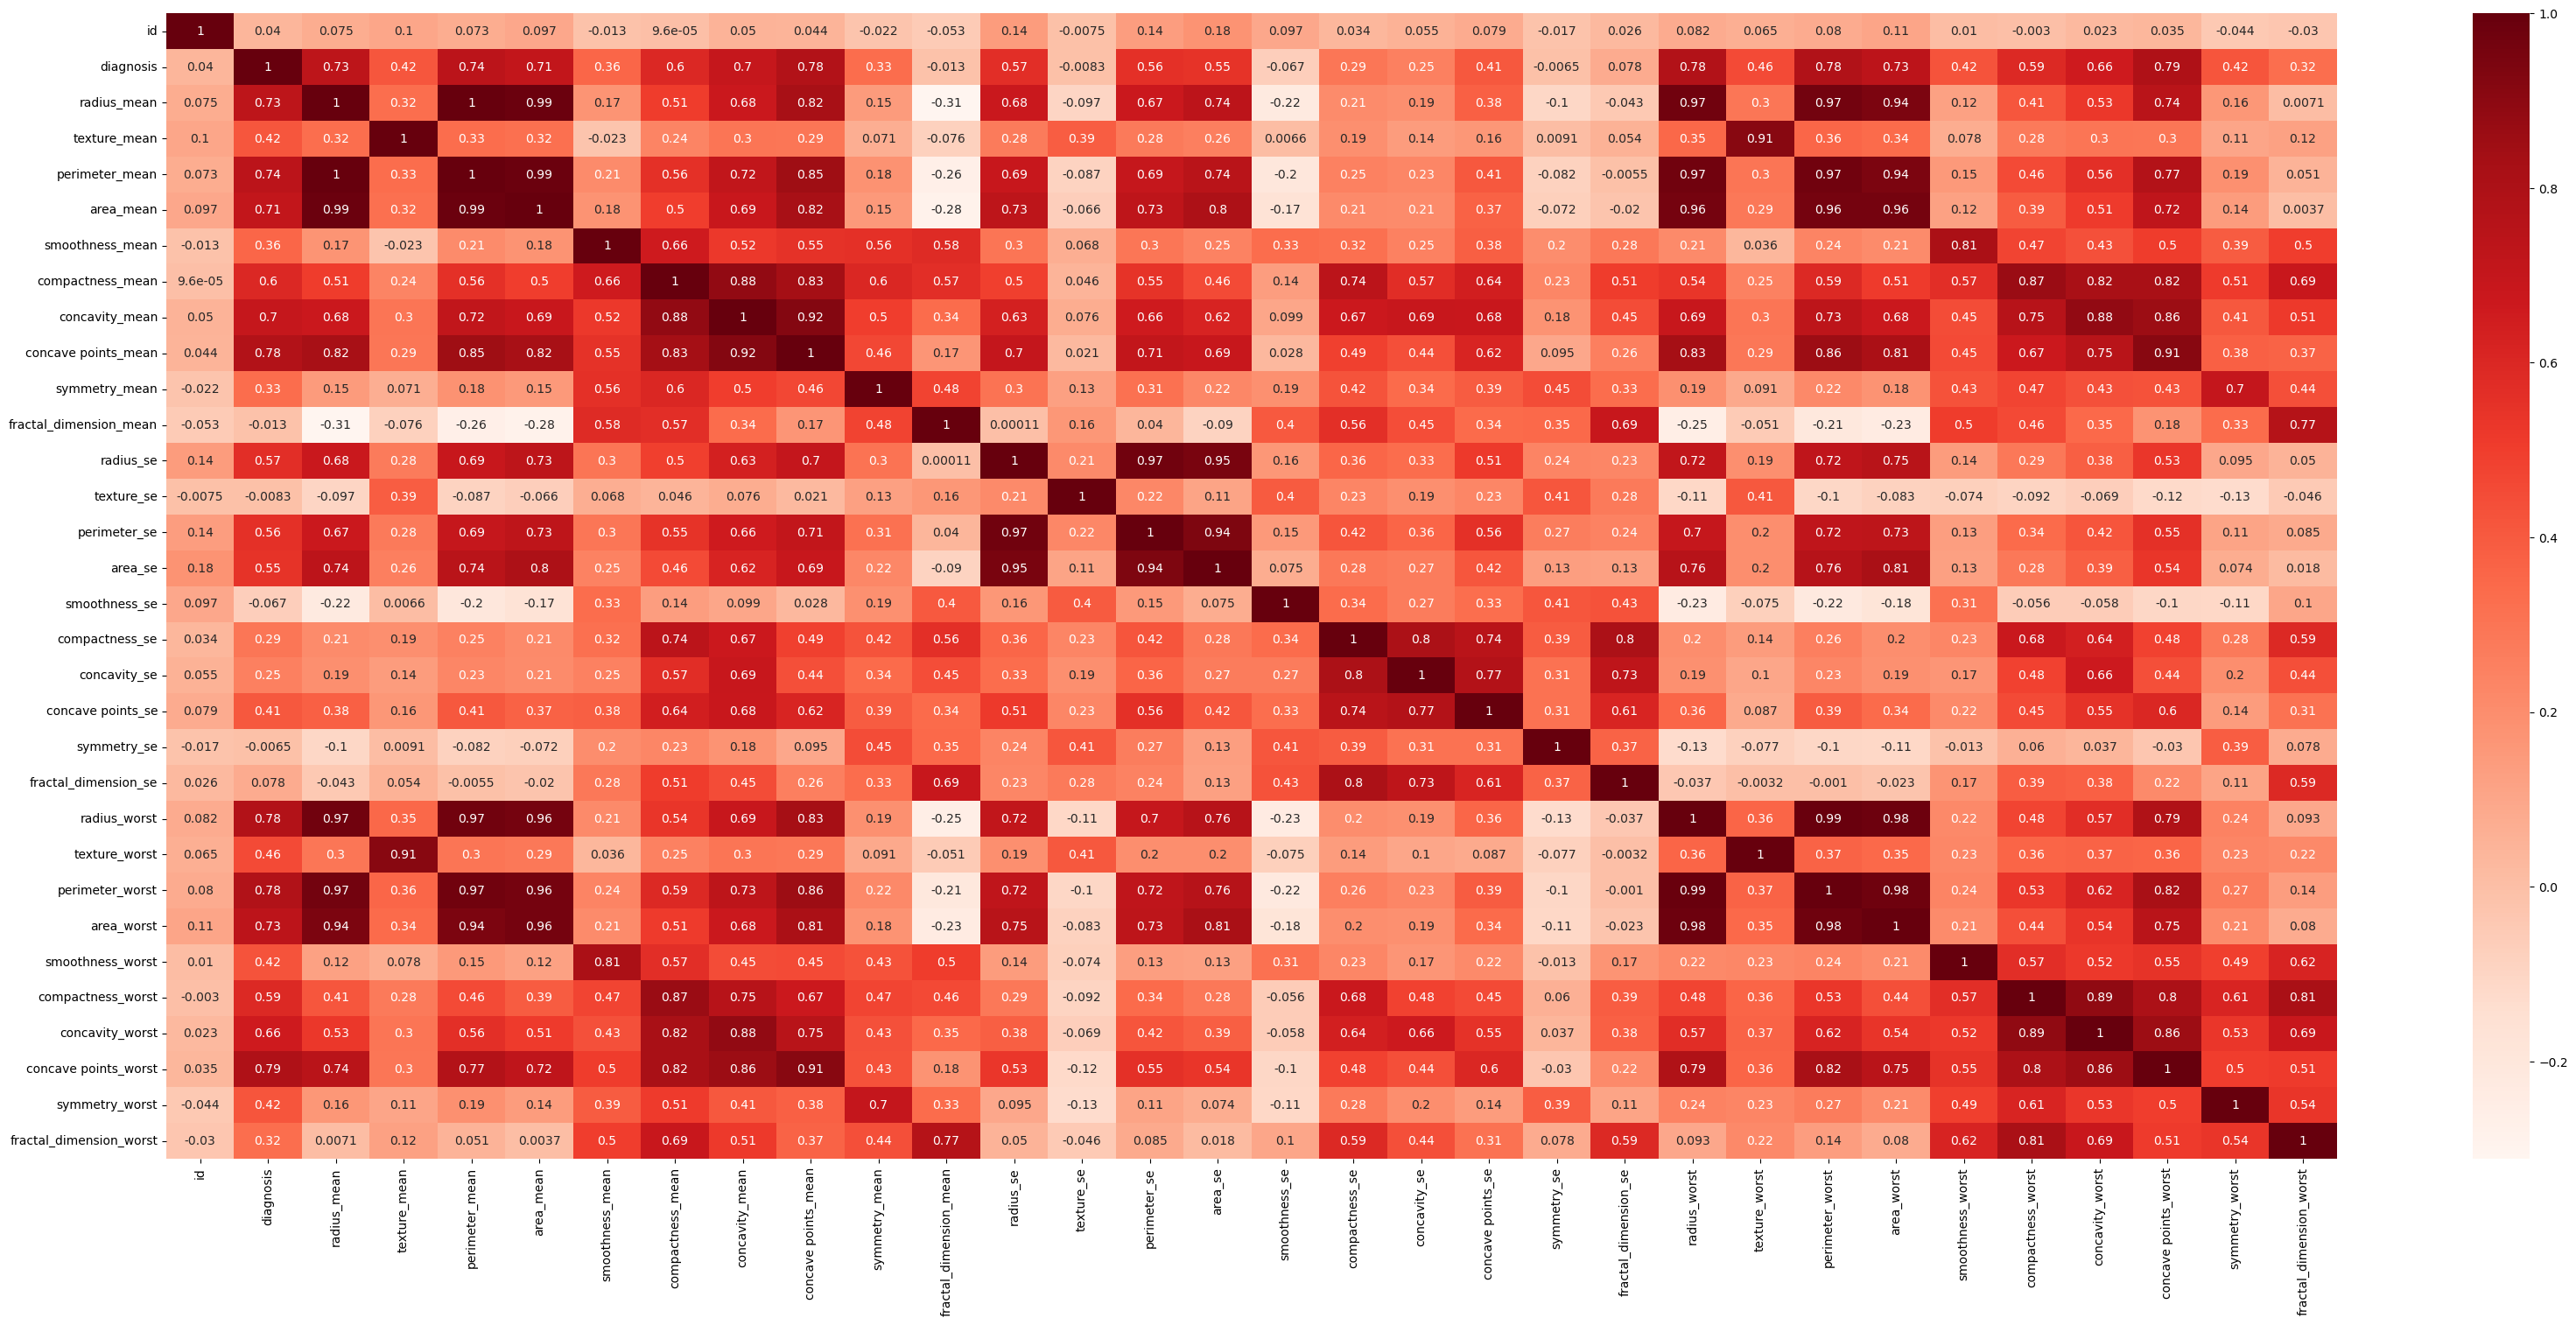

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(40, 17)
sns.heatmap(df.corr(),annot=True,cmap='Reds')

<Axes: xlabel='id', ylabel='concave points_worst'>

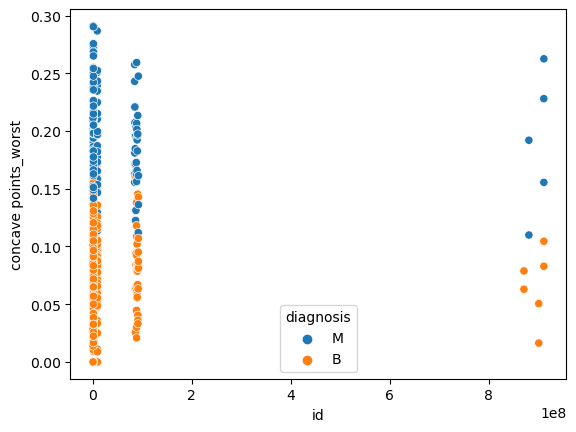

In [221]:
#Relation between diagnosis and concave points worst ( which seems to be the most related feature )
# 0 = Non Cancer
# 1 = Cancer 
sns.scatterplot(x='id',y='concave points_worst',data=df,hue='diagnosis')

In [325]:
# Lets try Logistic Regression 

import sklearn.model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('diagnosis', axis=1), df['diagnosis'], test_size=0.2)

# Train the logistic regression model

model_l = LogisticRegression()

model_l.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model_l.score(X_test, y_test)
print('Accuracy:', accuracy)

# Make predictions on the test set
predictions = model_l.predict(X_test)

# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print('Confusion matrix:')
print(confusion_matrix)


Accuracy: 0.5877192982456141
Confusion matrix:
[[67  0]
 [47  0]]


In [326]:
# Lets try support vector machines 

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('diagnosis', axis=1), df['diagnosis'], test_size=0.2)

# Train the SVM model
model_s = SVC()
model_s.fit(X_train, y_train)

# Make predictions on the test set
predictions = model_s.predict(X_test)

# Convert predictions to a list
predictions_list = predictions.tolist()

# Evaluate the model on the test set
accuracy = model_s.score(X_test, y_test)
print('Accuracy:', accuracy)

# Convert predictions list to a NumPy array
predictions_array = np.asarray(predictions_list)

# Calculate the confusion matrix
print(confusion_matrix(y_test, predictions_array))
print(confusion_matrix)

Accuracy: 0.6052631578947368
[[69  0]
 [45  0]]
<function confusion_matrix at 0x28c15d6c0>


In [327]:
# lets try decision tree


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('diagnosis', axis=1), df['diagnosis'], test_size=0.2)

# Train the decision tree model
model_d = DecisionTreeClassifier()
model_d.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model_d.score(X_test, y_test)
print('Accuracy:', accuracy)

# Make predictions on the test set
predictions = model_d.predict(X_test)

# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print('Confusion matrix:')
print(confusion_matrix)


Accuracy: 0.9298245614035088
Confusion matrix:
[[70  4]
 [ 4 36]]


In [337]:
print("*************************************************************************************************************")
print("CONCLUSION")
    
print("Until know the most suited solution is the Decision Tree Classifier, it got the highest accuracy", accuracy)  

print("It's the best I can do until know , I'll improve this predictions with neural networks")

print("Hope some day this really helps ")



*************************************************************************************************************
CONCLUSION
Until know the most suited solution is the Decision Tree Classifier, it got the highest accuracy 0.9298245614035088
It's the best I can do until know , I'll improve this predictions with neural networks
Hope some day this really helps 


In [292]:
# Lets bring Keras to the party 

!pip install keras
!pip install tensorflow


In [293]:
import keras 
import tensorflow as tf

In [308]:
import re

labels = ['positive', 'negative']

# Check if the strings are valid numbers
def is_valid_number(string):
  return bool(re.match(r'^\d+$', string))

# Convert the labels to integers
int_labels = [int(label) for label in labels if is_valid_number(label)]

# Calculate the loss
loss = tf.keras.losses.sparse_categorical_crossentropy(y_true=int_labels, y_pred=predictions)


TypeError: Cannot convert 1e-07 to EagerTensor of dtype string

In [309]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.losses import sparse_categorical_crossentropy

labels = ['positive', 'negative']

# Calculate the loss
loss = tf.keras.losses.sparse_categorical_crossentropy(y_true=labels, y_pred=predictions)

X_train, X_test, y_train, y_test = train_test_split(df.drop('diagnosis', axis=1), df['diagnosis'], test_size=0.2)

# Create the neural network model
model_k = Sequential()
model_k.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model_k.add(Dense(10, activation='relu'))
model_k.add(Dense(1, activation='sigmoid'))

# Compile the model
model_k.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_k.fit(X_train, y_train, epochs=100)

# Evaluate the model on the test set
accuracy = model_k.evaluate(X_test, y_test)[1]
print('Accuracy:', accuracy)

# Make predictions on the test set
predictions = model_k.predict(X_test)

# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print('Confusion matrix:')
print(confusion_matrix)


2023-08-25 02:53:58.126205: W tensorflow/core/framework/op_kernel.cc:1805] OP_REQUIRES failed at cast_op.cc:121 : UNIMPLEMENTED: Cast string to int64 is not supported


UnimplementedError: {{function_node __wrapped__Cast_device_/job:localhost/replica:0/task:0/device:CPU:0}} Cast string to int64 is not supported [Op:Cast] name: 